In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import skimage.measure as meas

from skimage.segmentation import mark_boundaries
import skimage.measure as meas

import imageio.v3 as iio
import pandas as pd
import skimage.segmentation as seg

In [2]:
PATH = 'plans/fp02.png'
metadata = iio.immeta(PATH)
print(metadata)
# fp01 = imageio.v3.imread('plans/fp01.png', pilmode='RGB')
# fp01 = iio.imread(PATH)
fp01 = iio.imread(PATH, pilmode='RGB')

{'dpi': (72.009, 72.009), 'srgb': 0, 'gamma': 0.45455, 'mode': 'RGBA', 'shape': (258, 82)}


In [3]:
fp01.shape

(82, 258, 3)

In [4]:
fp01.reshape((-1,3)).shape # 82*258

(21156, 3)

In [5]:
fp01_2d = fp01.reshape((-1,3))
reshaped = fp01_2d.reshape((82,258,3))
reshaped.shape

(82, 258, 3)

In [6]:
np.array_equal(fp01, reshaped)

True

In [31]:
np.zeros?

Docstring:
zeros(shape, dtype=float, order='C', *, like=None)

Return a new array of given shape and type, filled with zeros.

Parameters
----------
shape : int or tuple of ints
    Shape of the new array, e.g., ``(2, 3)`` or ``2``.
dtype : data-type, optional
    The desired data-type for the array, e.g., `numpy.int8`.  Default is
    `numpy.float64`.
order : {'C', 'F'}, optional, default: 'C'
    Whether to store multi-dimensional data in row-major
    (C-style) or column-major (Fortran-style) order in
    memory.
like : array_like, optional
    Reference object to allow the creation of arrays which are not
    NumPy arrays. If an array-like passed in as ``like`` supports
    the ``__array_function__`` protocol, the result will be defined
    by it. In this case, it ensures the creation of an array object
    compatible with that passed in via this argument.

    .. versionadded:: 1.20.0

Returns
-------
out : ndarray
    Array of zeros with the given shape, dtype, and order.

See Al

In [32]:
df = pd.DataFrame(fp01_2d, columns=["R", "G", "B"])
df["Label"] = np.zeros(len(df), dtype=np.int8)
df

,R,G,B,Label
0,255,0,0,0
1,255,0,0,0
2,255,0,0,0
3,255,0,0,0
4,255,0,0,0
...,...,...,...,...
21151,255,255,0,0
21152,255,255,0,0
21153,255,255,0,0
21154,255,255,0,0


In [33]:
groups = df.groupby(["R", "G", "B"]).groups
for ix, k in enumerate(groups.keys()):
    for i in list(groups[k]):
        df.at[i, "Label"] = int(ix)

print(len(df))

21156


In [34]:
df["Label"].unique()

array([1, 2, 0, 3], dtype=int8)

In [35]:
type(df.at[0, "Label"])

numpy.int8

In [36]:
fp01_split = np.array(df["Label"]).reshape([82,258])
fp01_split

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0]], dtype=int8)

In [ ]:
fp01_slic = seg.slic(fp01, n_segments=4, channel_axis=2)
fp01_slic

array([[1, 1, 1, ..., 3, 3, 3],
       [1, 1, 1, ..., 3, 3, 3],
       [1, 1, 1, ..., 3, 3, 3],
       ...,
       [1, 1, 1, ..., 3, 3, 3],
       [1, 1, 1, ..., 3, 3, 3],
       [1, 1, 1, ..., 3, 3, 3]])

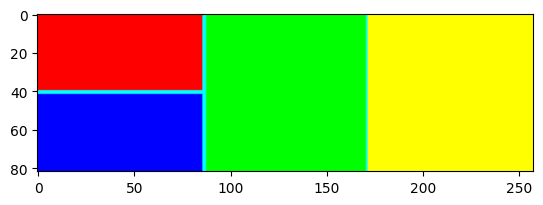

In [37]:
border_color = [0,1,1]
plt.imshow(mark_boundaries(fp01, fp01_split, color=border_color))

# test stuff...

In [ ]:
df.groupby(["R", "G", "B"]).groups[(-1, 0, 0)]

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            10397, 10398, 10399, 10400, 10401, 10402, 10403, 10404, 10405,
            10406],
           dtype='int64', length=3567)

In [ ]:
df.groupby(["R", "G", "B"]).groups[(0, -1, 0)]

Int64Index([   87,    88,    89,    90,    91,    92,    93,    94,    95,
               96,
            ...
            21059, 21060, 21061, 21062, 21063, 21064, 21065, 21066, 21067,
            21068],
           dtype='int64', length=6888)

In [ ]:
df.groupby(["R", "G", "B"]).groups[(0, 0, -1)]

Int64Index([10578, 10579, 10580, 10581, 10582, 10583, 10584, 10585, 10586,
            10587,
            ...
            20975, 20976, 20977, 20978, 20979, 20980, 20981, 20982, 20983,
            20984],
           dtype='int64', length=3567)